In [1]:
import joblib

In [2]:
eval=joblib.load('../evaluations/mnist_svc_validation_evaluation.pkl')

Point estimation for accuracy: 0.983
95 % confidence interval for accuracy: (0.9828659264414351,0.9831514068918982)


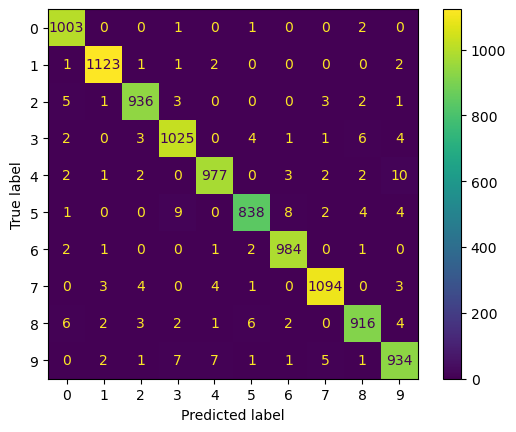

In [3]:
eval.show()

In [4]:
eval.df.sort_values(by='rank_test_score').head()

,param_svc__C,param_svc__gamma,param_svc__degree,param_svc__kernel,mean_test_score,std_test_score,rank_test_score
49,0.330575,0.107188,3,poly,0.8354,0.014746,1
47,1.962406,10.0,3,poly,0.8354,0.014746,1
2,0.300584,0.01698,3,poly,0.8354,0.014746,1
14,0.079002,0.01163,3,poly,0.8354,0.014746,1
37,0.08022,0.098539,2,poly,0.8158,0.009745,5


In [5]:
eval=joblib.load('../evaluations/mnist_rf_validation_evaluation.pkl')

Point estimation for accuracy: 0.9661
95 % confidence interval for accuracy: (0.9657954550564024,0.966174544943598)


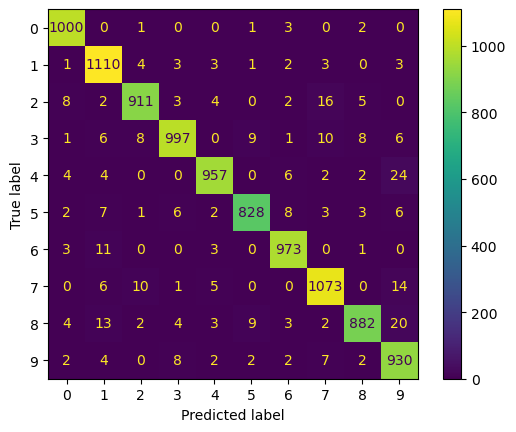

In [6]:
eval.show()

In [7]:
eval.df.sort_values(by='rank_test_score').head()

,param_rf__max_depth,param_rf__max_features,param_rf__max_samples,param_rf__min_samples_leaf,param_rf__min_samples_split,param_rf__n_estimators,mean_test_score,std_test_score,rank_test_score
44,16,sqrt,1.0,1,2,804,0.8504,0.005352,1
34,16,sqrt,1.0,1,2,693,0.8488,0.009042,2
38,16,sqrt,1.0,1,2,1000,0.8480,0.007457,3
46,16,sqrt,1.0,1,2,677,0.8468,0.006242,4
28,16,log2,0.924876,1,3,926,0.8466,0.006216,5


In [8]:
eval=joblib.load('../evaluations/mnist_cnn_validation_evaluation.pkl')

Point estimation for accuracy: 0.9866
95 % confidence interval for accuracy: (0.9865276859605021,0.9867863140394979)


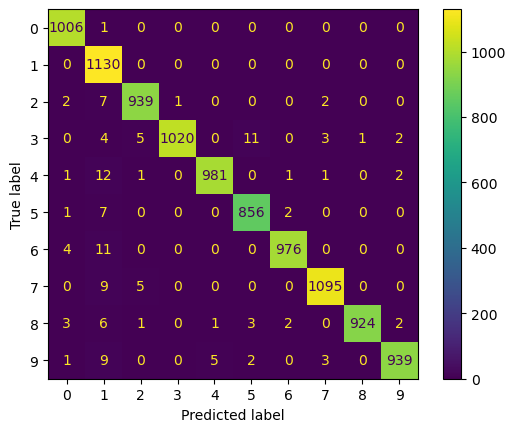

In [9]:
eval.show()

In [10]:
eval=joblib.load('../evaluations/mnist_cnn_test_evaluation.pkl')

Point estimation for accuracy: 0.9902
95 % confidence interval for accuracy: (0.9901323983322708,0.9903649350010627)


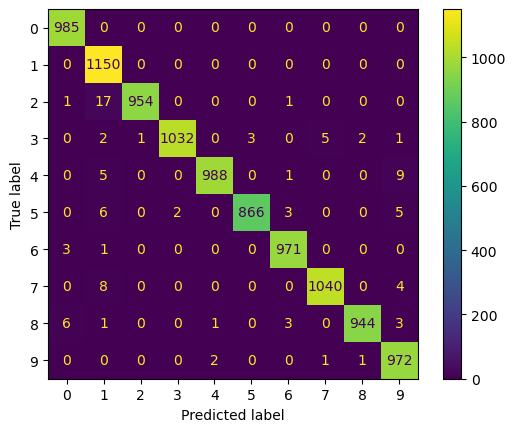

In [11]:
eval.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title('A classification problem')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# Function to plot decision boundary with margin
def plot_decision_boundary_with_margin(clf, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Compute decision function values for grid points
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Plot the decision boundary (solid line for Z=0)
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    
    # Plot the margin boundaries (dashed lines for Z=-1 and Z=1)
    plt.contour(xx, yy, Z, levels=[-1, 1], colors='black', linestyles='dashed', linewidths=1.5)
    
    # Plot dataset points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', label='Data points')
    
    # Highlight support vectors
    plt.scatter(
        X[clf.support_, 0], X[clf.support_, 1], 
        facecolors='white', edgecolors='black', s=100, label='Support Vectors'
    )

    plt.title("Suppor Vector Machine Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Function to plot decision boundary with solid black line
def plot_decision_boundary(clf, X, y,title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # Predict labels for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Scatter plot of data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Color-coded regions
    
    # Draw solid black decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
    
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Function to plot decision tree structure
def plot_tree_structure(clf):
    plt.figure(figsize=(5, 6))
    plot_tree(clf, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
    plt.title("Decision Tree Structure")
    plt.show()




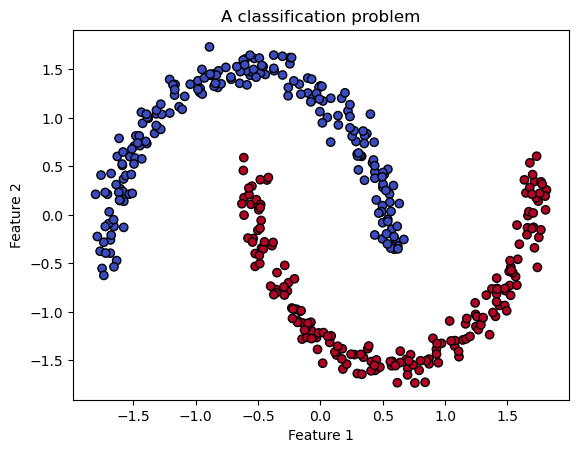

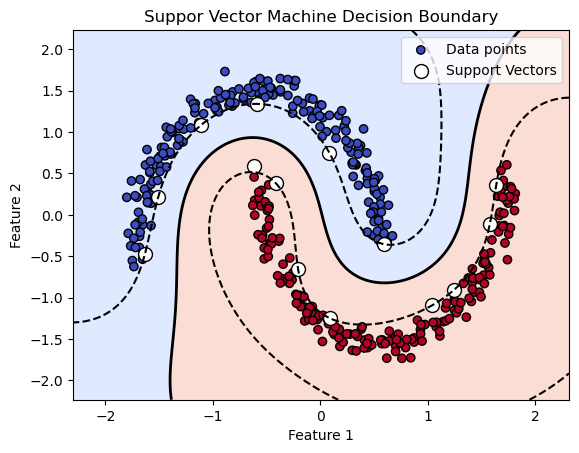

In [13]:
# Train an SVC classifier with a higher margin penalty (C=10.0)
clf = SVC(kernel='rbf', C=10.0, gamma='scale')
clf.fit(X_train, y_train)
# Plot dataset with decision boundary for SVC
plot_dataset(X_train,y_train)
plot_decision_boundary_with_margin(clf, X_train, y_train)

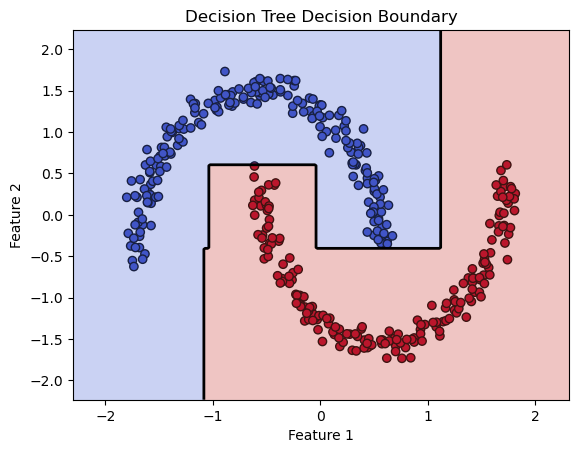

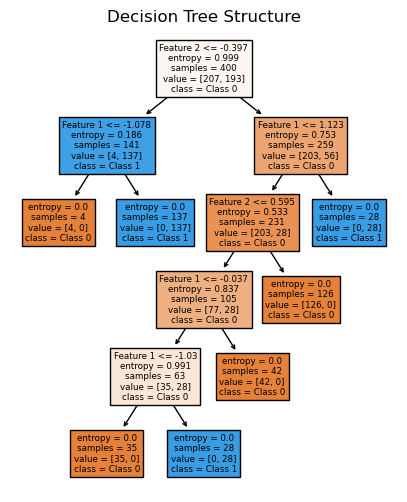

In [14]:
# Plot decision boundary for RFC
clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)  # Limiting depth for better visualization
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, 'Decision Tree Decision Boundary')
# Plot tree structure for decision tree
plot_tree_structure(clf)

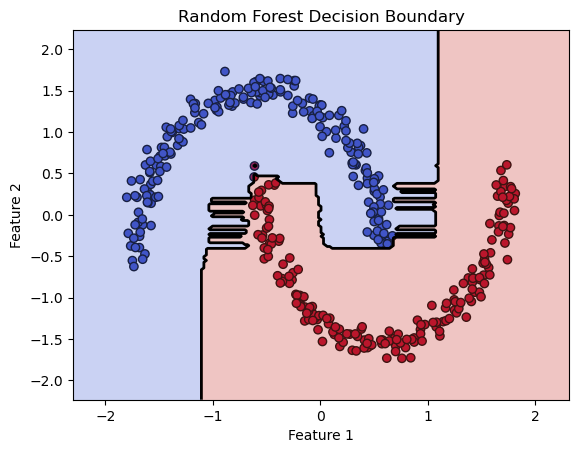

In [15]:
# Plot decision boundary for RFC
clf = RandomForestClassifier(n_estimators=1000,max_samples=0.5)
clf.fit(X_train, y_train)
plot_decision_boundary(clf, X_train, y_train, 'Random Forest Decision Boundary')

1250/1250 [==============================] - 1s 743us/step


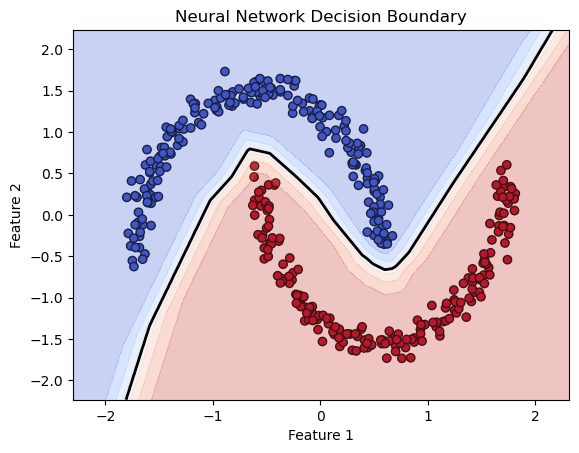

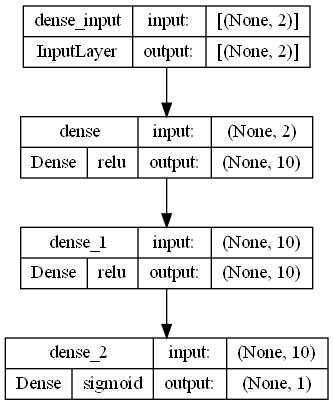

In [16]:
# Build a simple feedforward DNN
clf = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
clf.fit(X_train, y_train, epochs=100,verbose=0, batch_size=16)
#plot
plot_decision_boundary(clf, X_train, y_train,'Neural Network Decision Boundary')
plot_model(clf, show_shapes=True, show_layer_names=True,show_layer_activations=True)

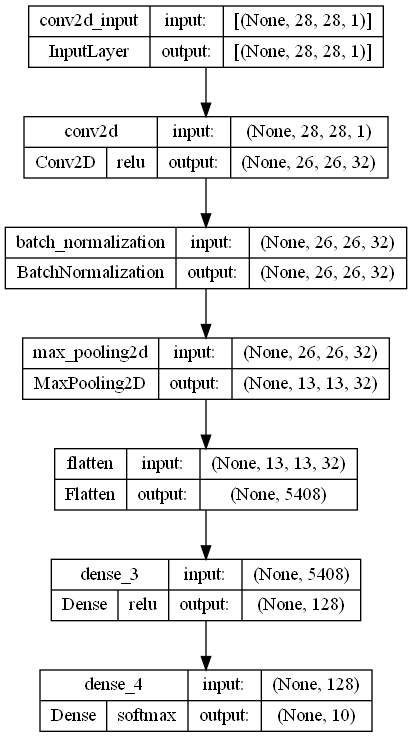

In [17]:
# Build a simple convolutional neural network
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
#plot
plot_model(model, show_shapes=True, show_layer_names=True,show_layer_activations=True)

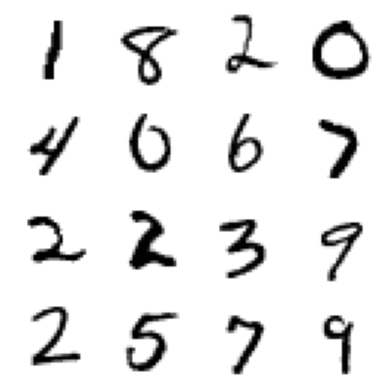

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False,parser='auto')
X = mnist["data"]
# Select 16 random images
indices = np.random.choice(len(X), 16, replace=False)
selected_images = X[indices]

# Create a 4x4 plot
fig, axes = plt.subplots(4, 4, figsize=(4, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(selected_images[i].reshape(28,28), cmap='binary')
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

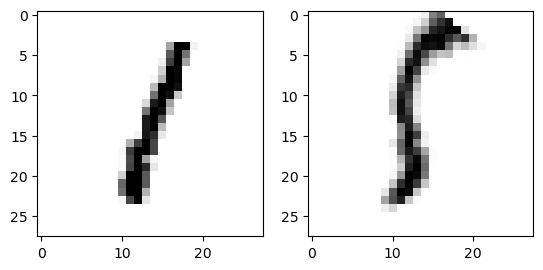

In [19]:
from sklearn.datasets import fetch_openml
import numpy as np
from elastic_transformer import ElasticTransformer
n_samples = 70000
t_size = 10000
# Load from openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False,parser='auto')
X = mnist["data"][:n_samples,:]
y = mnist["target"].astype(np.uint8)[:n_samples]
et=ElasticTransformer()
et.display_example(X)

In [20]:
import pandas as pd
from tensorflow.keras.models import load_model
# Function to display a summary of a model in a pandas DataFrame
def summary_df(model):
    summary = []
    for layer in model.layers:
        activation = getattr(layer, 'activation', None)
        if activation is not None:
            activation = activation.__name__
        n_filters = getattr(layer, 'filters', None)
        n_units = getattr(layer, 'units', None)
        if n_filters is not None:
            n_neurons = n_filters
        else:
            n_neurons = n_units
        summary.append({
            'Type of layer': layer.__class__.__name__,
            'Number of neurons' : n_neurons,
            'Activation function' : activation,
            'Output Shape': layer.output_shape,
            'Number of Parameters': layer.count_params()
        })
    df = pd.DataFrame(summary)
    df['Number of neurons'] = pd.to_numeric(df['Number of neurons'], errors='coerce').fillna(0).astype('int64')
    return df
# Load and display model
model = load_model('mnist_cnn.h5')
df=summary_df(model)
df.style.hide(axis='index')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4070 Laptop GPU, compute capability 8.9


Type of layer,Number of neurons,Activation function,Output Shape,Number of Parameters
Conv2D,32,relu,"(None, 28, 28, 32)",288
BatchNormalization,0,None,"(None, 28, 28, 32)",128
Conv2D,64,relu,"(None, 28, 28, 64)",18432
BatchNormalization,0,None,"(None, 28, 28, 64)",256
MaxPooling2D,0,None,"(None, 14, 14, 64)",0
Conv2D,128,relu,"(None, 14, 14, 128)",73728
BatchNormalization,0,None,"(None, 14, 14, 128)",512
Conv2D,256,relu,"(None, 14, 14, 256)",294912
BatchNormalization,0,None,"(None, 14, 14, 256)",1024
MaxPooling2D,0,None,"(None, 7, 7, 256)",0
